## Credit Card Fraud Detection Using Supervised Learning


### Introduction

Credit card fraud is a serious issue affecting financial institutions; It poses significant financial threat and security risks to banks, credit card companies and their customers. Detecting fraudulent transactions is challenging due to the high imbalanced nature of the dataset, where fraudulent cases are rare compared to legitimate transactions.

### Objective

The goal of this project is to develop models capable of detecting fradulent transactions by identifying unusual patterns in transaction data. 

We will implement and compare the performance of three supervised models:
- **Random Forest**
- **XGBoost**
- **Logistic Regression**


### Data Description

Source : [Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/dat)

This dataset contains credit card transactions made by European cardholders in September 2013. The dataset is highly imbalanced, with fraudulent transactions accounting for only 0.17% of the total transactions.
It has been preprocessed using Principal Component Analysis (PCA) for anonymity, meaning the original feature names and meanings are not available.

* Total Transactions: 284,807
* Fraudulent Transactions: 492 (~0.17% of total)
* Legitimate Transactions: 284,315 (~99.83% of total)
* Number of Features: 30


## Data Loading and Exploration

In [66]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
## Read in dataset
file = ('creditcard.csv')
df = pd.read_csv(file)

In [68]:
# Basic data inspection
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
df_head = df.head()
df_head

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
# Check Shape
num_rows = df.shape[0]
num_columns = df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 284807
Number of columns: 31


In [71]:
#Check for Missing Values

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Data Preprocessing

In [72]:
#Check for Missing Values

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [73]:
#Check for duplicates

print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 1081


In [74]:
#Verify duplicates
duplicates = df[df.duplicated()]
print(duplicates.head())

     Time        V1        V2        V3        V4        V5        V6  \
33   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
33   0.001031  0.098816 -0.552904 -0.073288  0.023307    

In [75]:
df = df.drop_duplicates()
print(f"Dataset shape after removing exact duplicates: {df.shape}")

Dataset shape after removing exact duplicates: (283726, 31)


In [76]:
class_counts = df['Class'].value_counts()
print(f"Class distribution after duplicate removal:\n{class_counts}")
print(f"Fraud Percentage: {(class_counts[1] / class_counts.sum()) * 100:.4f}%")

Class distribution after duplicate removal:
Class
0    283253
1       473
Name: count, dtype: int64
Fraud Percentage: 0.1667%


In [77]:
from sklearn.preprocessing import StandardScaler

# Standardize Amount

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [78]:
# Drop Time
df = df.drop('Time', axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [79]:
# Separate features X and target y

X = df.drop(columns=['Class'])
y = df['Class']

## Handle Imbalance

Class Distribution:
         Count Percentage
Class                   
0      283253     99.83%
1         473      0.17%


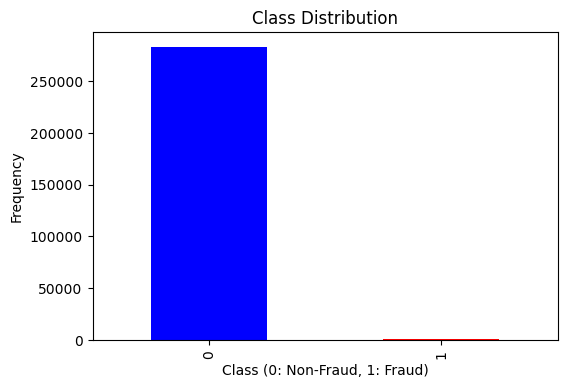

In [80]:
# Get class distribution with counts and percentages
class_distribution = df['Class'].value_counts().to_frame('Count')
class_distribution['Percentage'] = (df['Class'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print("Class Distribution:\n", class_distribution.to_string())

# Plot class distribution
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar', title='Class Distribution', color=['blue', 'red'])
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Frequency')
plt.show()

In [81]:
#Undersample the majority class

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n = len(fraud) * 10, random_state=42 )

In [82]:
# combine undersampled dataset

df_balanced = pd.concat([fraud, non_fraud])

#Separate target class in the balanced dataset
X_balanced = df_balanced.drop(columns=['Class'])
y_balanced = df_balanced['Class']

## Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

print(f" Training Set Size: {X_train.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")
print(f" Fraud Percentage in Training: {y_train.mean() * 100:.2f}%")
print(f" Fraud Percentage in Test: {y_test.mean() * 100:.2f}%")

 Training Set Size: 4162
Test Set Size: 1041
 Fraud Percentage in Training: 9.08%
 Fraud Percentage in Test: 9.13%


## Model Training & Evaluation

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 

    print(f"\n {model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    labels = ['Legitimate', 'Fraudulent']
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

                       


## Logistic Regression


 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       0.99      0.86      0.92        95

    accuracy                           0.99      1041
   macro avg       0.99      0.93      0.96      1041
weighted avg       0.99      0.99      0.99      1041



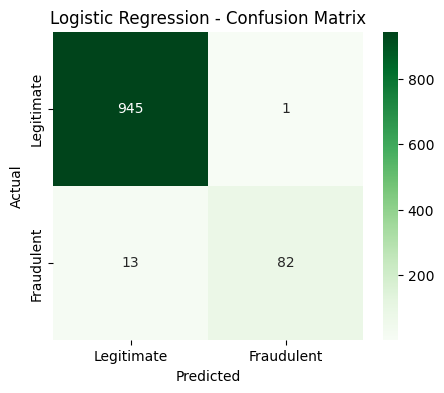

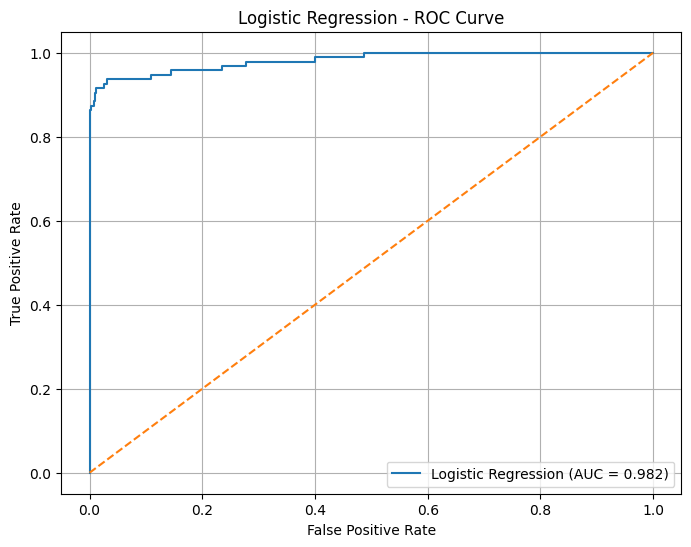

In [86]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test, "Logistic Regression")


## Random Forest


 Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       1.00      0.86      0.93        95

    accuracy                           0.99      1041
   macro avg       0.99      0.93      0.96      1041
weighted avg       0.99      0.99      0.99      1041



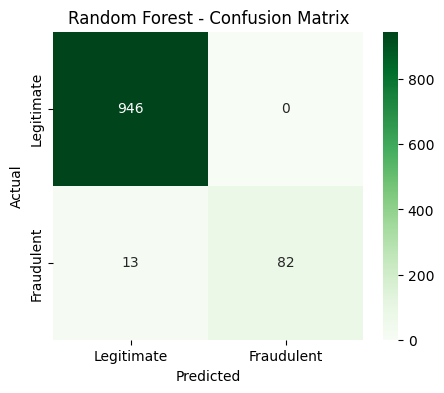

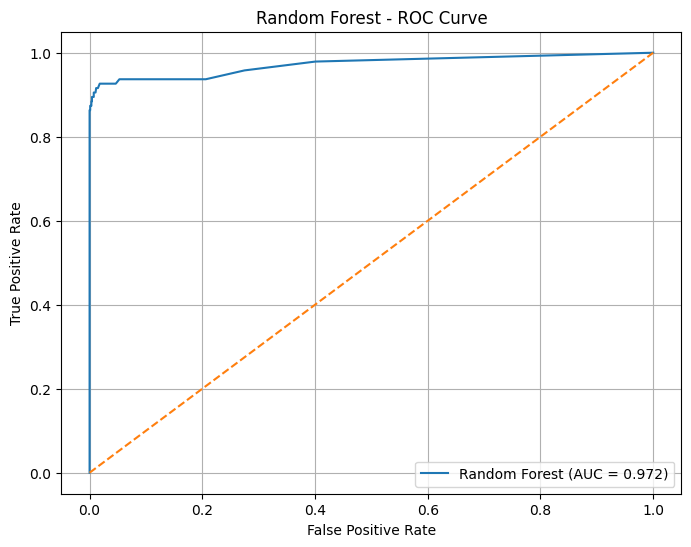

In [87]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest")

## XGBoost


/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:05:14] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       0.99      0.87      0.93        95

    accuracy                           0.99      1041
   macro avg       0.99      0.94      0.96      1041
weighted avg       0.99      0.99      0.99      1041



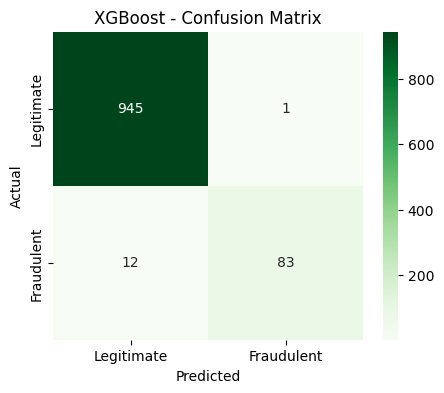

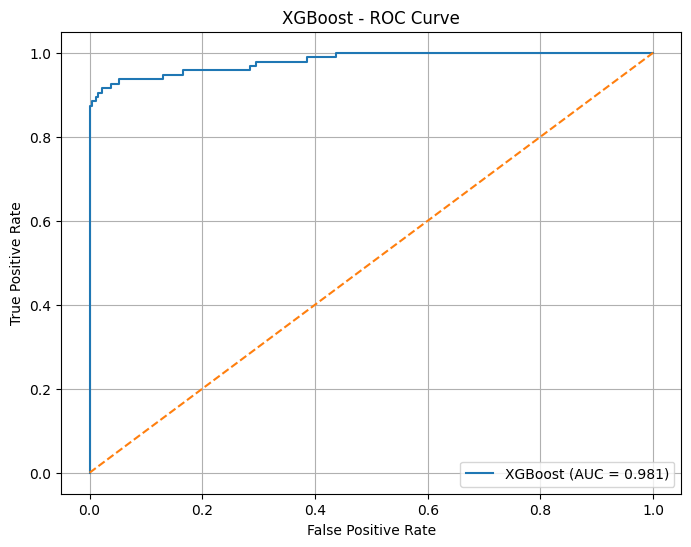

In [88]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

## Model Comparision

In [100]:
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Helper function to get evaluation metrics for fraud class (1)
def get_model_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 

    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)

    return {
        "Model": model_name,
        "Precision (Fraud)": round(report["1"]["precision"], 2),
        "Recall (Fraud)": round(report["1"]["recall"], 2),
        "F1-score (Fraud)": round(report["1"]["f1-score"], 2),
        "AUC": round(auc, 2)
    }

# Collect metrics
results = []
results.append(get_model_metrics(log_model, X_test, y_test, "Logistic Regression"))
results.append(get_model_metrics(rf_model, X_test, y_test, "Random Forest"))
results.append(get_model_metrics(xgb_model, X_test, y_test, "XGBoost"))

# Create DataFrame
comparison_df = pd.DataFrame(results)

from IPython.display import display
display(comparison_df)

,Model,Precision (Fraud),Recall (Fraud),F1-score (Fraud),AUC
0,Logistic Regression,0.99,0.86,0.92,0.98
1,Random Forest,1.00,0.86,0.93,0.97
2,XGBoost,0.99,0.87,0.93,0.98


## Conclusion

This project demonstrates the effectiveness of supervised learning techniques in handling imbalanced fraud detection problems. All models showed high performance, with Random Forest and XGBoost slightly outperforming Logistic Regression in precision-recall trade-offs for the fraud class.

This work reinforces the importance of:

* Selecting the right metrics for imbalanced data (e.g., recall and AUC over accuracy),
* Testing multiple models,
* And maintaining high precision to minimize false positives.